# Clasificador de Tweets
- Irving Acosta 22781
- Ricardo Chuy 

Cargar la data.


In [1]:
from pathlib import Path
import pandas as pd

candidate = Path("train.csv")

if candidate.exists():
    df = pd.read_csv(candidate)
    print("Dimensiones:", df.shape)
    display(df.head())


Dimensiones: (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
import pandas as pd
from IPython.display import display

print("Shape:", df.shape)
print("\nColumnas:", df.columns.tolist(), "\n")
display(df.head(6))

print("\nInfo resumida:")
df.info()

print("\nValores nulos por columna:\n", df.isna().sum())
print("\nDuplicados (filas):", df.duplicated().sum())

if 'target' in df.columns:
    print("\nDistribución target:")
    print(df['target'].value_counts(dropna=False))

df['text_len'] = df['text'].astype(str).str.len()
print("\nEstadísticas de longitud de texto:")
print(df['text_len'].describe())
display(df[['text','target','text_len']].sample(6, random_state=42))


Shape: (7613, 5)

Columnas: ['id', 'keyword', 'location', 'text', 'target'] 



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1



Info resumida:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB

Valores nulos por columna:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Duplicados (filas): 0

Distribución target:
target
0    4342
1    3271
Name: count, dtype: int64

Estadísticas de longitud de texto:
count    7613.000000
mean      101.161697
std        33.854073
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_len, dtype: float64


,text,target,text_len
2644,So you have a new weapon that can cause un-ima...,1,66
2227,The f$&amp;@ing things I do for #GISHWHES Just...,0,119
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1,125
132,Aftershock back to school kick off was great. ...,0,114
6845,in response to trauma Children of Addicts deve...,0,105
5559,@Calum5SOS you look like you got caught in a r...,0,102


## Limpieza

In [3]:
import re, html
import pandas as pd

def clean_text_basic(text):
    if pd.isna(text):
        return ""
    s = str(text)
    # decode html entities
    s = html.unescape(s)
    # remove urls
    s = re.sub(r'http\S+|www\.\S+', ' ', s)
    # remove mentions
    s = re.sub(r'@\w+', ' ', s)
    # remove hashtag symbol but keep the word (e.g. #help -> help)
    s = re.sub(r'#', '', s)
    # replace punctuation with space (preserve unicode word characters)
    s = re.sub(r'[^\w\s]', ' ', s)
    # lowercase
    s = s.lower()
    # collapse whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# Aplica la limpieza y crea columna nueva
df['clean_text'] = df['text'].apply(clean_text_basic)

# Vista rápida para comprobar
display(df[['text','clean_text']].head(8))
print("\nEjemplo (original -> limpio):")
for i, row in df[['text','clean_text']].sample(5, random_state=1).iterrows():
    print(f"- [{i}] {row['text'][:80]!s} -> {row['clean_text'][:80]!s}")


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfires evacuation ord...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfire update california hwy 20 closed in b...
6,#flood #disaster Heavy rain causes flash flood...,flood disaster heavy rain causes flash floodin...
7,I'm on top of the hill and I can see a fire in...,i m on top of the hill and i can see a fire in...



Ejemplo (original -> limpio):
- [3228] Goulburn man Henry Van Bilsen missing: Emergency services are searching for a Go -> goulburn man henry van bilsen missing emergency services are searching for a gou
- [3706] The things we fear most in organizations--fluctuations disturbances imbalances-- -> the things we fear most in organizations fluctuations disturbances imbalances ar
- [6957] @tsunami_esh ?? hey Esh -> hey esh
- [2887] @POTUS you until you drown by water entering the lungs. You being alive has caus -> you until you drown by water entering the lungs you being alive has caused this 
- [7464] Crawling in my skin
These wounds they will not hea -> crawling in my skin these wounds they will not hea


In [4]:
import pandas as pd
import sys

try:
    import spacy
except Exception:
    print("Instalando spaCy...")
    !pip install -q spacy
    import spacy

try:
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
except Exception:
    print("Descargando modelo en_core_web_sm...")
    !python -m spacy download en_core_web_sm -q
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

from spacy.lang.en.stop_words import STOP_WORDS

# Usaremos la columna 'clean_text' (resultado de la Celda A)
if 'clean_text' not in df.columns:
    df['clean_text'] = df['text'].apply(lambda x: str(x).lower())

def lemmatize_list_of_texts(texts, batch_size=64):
    """Devuelve lista de strings lematizados y sin stopwords. Usa nlp.pipe para ser rápido."""
    out = []
    for doc in nlp.pipe(texts, batch_size=batch_size):
        lemmas = []
        for token in doc:
            # filtrar: stopwords, espacios, puntuacion, números, tokens muy cortos
            if token.is_space or token.is_punct or token.is_stop or token.like_num:
                continue
            lemma = token.lemma_.lower().strip()
            if not lemma or lemma in STOP_WORDS or len(lemma) < 2:
                continue
            lemmas.append(lemma)
        out.append(" ".join(lemmas))
    return out

# Aplica sobre la columna limpia
texts = df['clean_text'].astype(str).tolist()
df['clean_text_lem'] = lemmatize_list_of_texts(texts)

display(df[['clean_text','clean_text_lem']].head(8))
print("\nEjemplos aleatorios (clean -> lematizado):")
for i, row in df[['clean_text','clean_text_lem']].sample(6, random_state=2).iterrows():
    print(f"- [{i}] {row['clean_text'][:80]!s} -> {row['clean_text_lem'][:80]!s}")


,clean_text,clean_text_lem
0,our deeds are the reason of this earthquake ma...,deed reason earthquake allah forgive
1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...,resident ask shelter place notify officer evac...
3,13 000 people receive wildfires evacuation ord...,people receive wildfire evacuation order calif...
4,just got sent this photo from ruby alaska as s...,send photo ruby alaska smoke wildfire pour school
5,rockyfire update california hwy 20 closed in b...,rockyfire update california hwy close directio...
6,flood disaster heavy rain causes flash floodin...,flood disaster heavy rain cause flash flooding...
7,i m on top of the hill and i can see a fire in...,hill fire wood



Ejemplos aleatorios (clean -> lematizado):
- [3190] practice your families fire escape plan so everyone knows what to do in case of  -> practice family fire escape plan know case emergency
- [6171] fuck sleeping with sirens -> fuck sleep siren
- [1196] i m a gemini children screaming buildings burning police sirens in the distance -> gemini child scream building burn police siren distance
- [680] montgomery come for the blazing hot weather stay for the stds yet another reject -> montgomery come blaze hot weather stay stds reject city slogan
- [3358] i got evacuated from the cinema 30 mins through inside out kill me please -> evacuate cinema min inside kill
- [6432] 25 dead in kuwait mosque suicide bombing claimed by isis offshoot on -> dead kuwait mosque suicide bombing claim isis offshoot


Top 20 unigrams — clase 1 (desastre)
            the    1364
             in    1164
              a     935
             of     928
             to     757
            and     506
             on     420
            for     401
              i     387
              s     361
             is     352
             at     308
             by     278
           from     245
             it     240
           that     210
           with     192
           this     182
           fire     182
          after     181

Top 20 unigrams — clase 0 (no desastre)
            the    1911
              i    1391
              a    1265
             to    1192
            and     920
             of     902
             in     822
            you     757
             is     598
              s     549
             my     546
             it     539
            for     493
             on     440
           that     413
           with     380
              t     338
           this     298
          

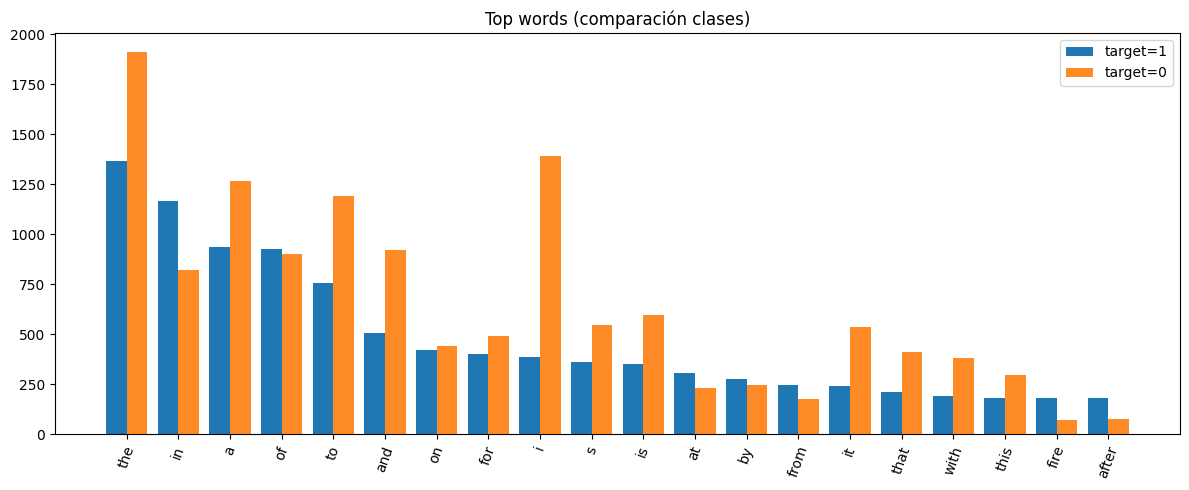


Estadísticas de longitud (clean tokens) por clase:
         count       mean       std  min   25%   50%   75%   max
target                                                          
0       4342.0  14.008982  6.478975  1.0   9.0  14.0  19.0  32.0
1       3271.0  14.414858  5.483588  1.0  10.0  14.0  18.0  34.0


<Figure size 800x400 with 0 Axes>

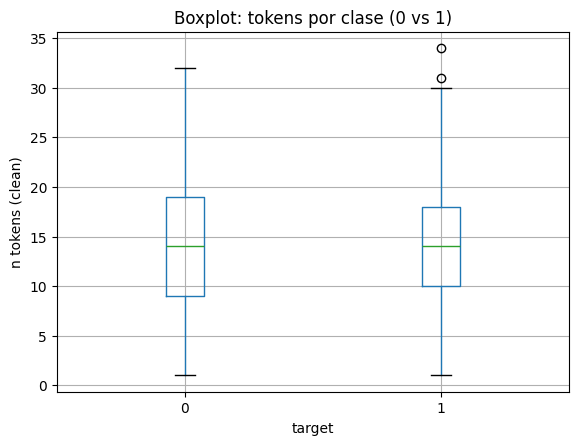


Ejemplos de tweets de clase 1 que contienen 'fire' o 'flood' (si existen):


C:\Users\andre\AppData\Local\Temp\ipykernel_3728\959138385.py:100: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  examples = df[(df['target']==1) & (df['clean_text'].str.contains(r'\b(fire|flood|earthquake|storm|bomb|attack)\b', regex=True, na=False))]


,text,clean_text,target
5547,Wow what beauty lies within every storm. Taken...,wow what beauty lies within every storm taken ...,1
3346,Trafford Centre film fans angry after Odeon ci...,trafford centre film fans angry after odeon ci...,1
4031,IT STARTS A FOREST FIRE THAT CANNOT BE PUT OUT...,it starts a forest fire that cannot be put out,1
6390,16yr old PKK suicide bomber who detonated bomb...,16yr old pkk suicide bomber who detonated bomb...,1
1240,someone: mentions gansey on fire\r\nme busting...,someone mentions gansey on fire me busting thr...,1
3783,@BrookTekle_ didn't look like a murder scene j...,didn t look like a murder scene just 1 cops a ...,1


In [5]:

import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

TOP_N = 20

if 'clean_text' not in df.columns:
    raise RuntimeError("No encontré df['clean_text']. Ejecuta la Celda A de limpieza primero.")

corpus = df['clean_text'].astype(str)

def top_ngrams(texts, ngram_range=(1,1), k=20):
    vec = CountVectorizer(ngram_range=ngram_range, token_pattern=r'\b\w+\b', min_df=1)
    X = vec.fit_transform(texts)
    sums = np.asarray(X.sum(axis=0)).ravel()
    terms = np.array(vec.get_feature_names_out())
    top_idx = np.argsort(sums)[::-1][:k]
    return list(zip(terms[top_idx], sums[top_idx]))

# 1) Top unigrams por clase
print("Top {} unigrams — clase 1 (desastre)".format(TOP_N))
top1 = top_ngrams(df.loc[df['target']==1,'clean_text'], ngram_range=(1,1), k=TOP_N)
for w,c in top1:
    print(f"{w:>15}  {c:>6}")

print("\nTop {} unigrams — clase 0 (no desastre)".format(TOP_N))
top0 = top_ngrams(df.loc[df['target']==0,'clean_text'], ngram_range=(1,1), k=TOP_N)
for w,c in top0:
    print(f"{w:>15}  {c:>6}")

# 2) Top bigrams y trigrams por clase
print("\nTop {} bigrams — clase 1".format(TOP_N))
for w,c in top_ngrams(df.loc[df['target']==1,'clean_text'], ngram_range=(2,2), k=TOP_N):
    print(f"{w:>30}  {c:>6}")

print("\nTop {} bigrams — clase 0".format(TOP_N))
for w,c in top_ngrams(df.loc[df['target']==0,'clean_text'], ngram_range=(2,2), k=TOP_N):
    print(f"{w:>30}  {c:>6}")

print("\nTop {} trigrams — clase 1 (breve)".format(10))
for w,c in top_ngrams(df.loc[df['target']==1,'clean_text'], ngram_range=(3,3), k=10):
    print(f"{w:>40}  {c:>6}")

# 3) Gráficos
def plot_top_compare(top_list1, top_list0, title="Top words comparison"):
    # crear dicts
    d1 = dict(top_list1)
    d0 = dict(top_list0)

    words = list(dict(top_list1 + top_list0).keys())[:TOP_N]
    vals1 = [d1.get(w,0) for w in words]
    vals0 = [d0.get(w,0) for w in words]
    x = np.arange(len(words))
    width = 0.4
    plt.figure(figsize=(12,6))
    plt.bar(x - width/2, vals1, width, label='target=1')
    plt.bar(x + width/2, vals0, width, label='target=0', alpha=0.8)
    plt.xticks(x, words, rotation=70)
    plt.ylabel("Frequency")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Tomamos los TOP_N globales (unión de tops)
global_top = list(dict(top1 + top0).keys())[:TOP_N]

def counts_for_words(texts, words):
    vec = CountVectorizer(vocabulary=words, token_pattern=r'\b\w+\b')
    X = vec.fit_transform(texts)
    return np.asarray(X.sum(axis=0)).ravel()

words = global_top
vals1 = counts_for_words(df.loc[df['target']==1,'clean_text'], words)
vals0 = counts_for_words(df.loc[df['target']==0,'clean_text'], words)

plt.figure(figsize=(12,5))
x = np.arange(len(words))
plt.bar(x-0.2, vals1, 0.4, label='target=1')
plt.bar(x+0.2, vals0, 0.4, label='target=0', alpha=0.9)
plt.xticks(x, words, rotation=70)
plt.title("Top words (comparación clases)")
plt.legend(); plt.tight_layout(); plt.show()

df['clean_len'] = df['clean_text'].str.split().apply(len)
print("\nEstadísticas de longitud (clean tokens) por clase:")
print(df.groupby('target')['clean_len'].describe())

plt.figure(figsize=(8,4))
df.boxplot(column='clean_len', by='target')
plt.title("Boxplot: tokens por clase (0 vs 1)")
plt.suptitle("")
plt.xlabel("target")
plt.ylabel("n tokens (clean)")
plt.show()

print("\nEjemplos de tweets de clase 1 que contienen 'fire' o 'flood' (si existen):")
examples = df[(df['target']==1) & (df['clean_text'].str.contains(r'\b(fire|flood|earthquake|storm|bomb|attack)\b', regex=True, na=False))]
display(examples[['text','clean_text','target']].sample(min(6,len(examples)), random_state=1))


In [6]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

col = 'clean_text_lem' if 'clean_text_lem' in df.columns else 'clean_text'
print("Usando columna:", col)

def top_ngrams_from_col(df, target_val, ngram_range=(1,1), k=20):
    texts = df.loc[df['target']==target_val, col].astype(str)
    vec = CountVectorizer(ngram_range=ngram_range, token_pattern=r'\b\w+\b', min_df=1)
    X = vec.fit_transform(texts)
    sums = np.asarray(X.sum(axis=0)).ravel()
    terms = np.array(vec.get_feature_names_out())
    idx = np.argsort(sums)[::-1][:k]
    return list(zip(terms[idx], sums[idx]))

TOP = 20
print("\n--- Top unigrams (lematizados) — target=1 ---")
for w,c in top_ngrams_from_col(df, 1, (1,1), TOP):
    print(f"{w:>18} {c:6}")

print("\n--- Top unigrams (lematizados) — target=0 ---")
for w,c in top_ngrams_from_col(df, 0, (1,1), TOP):
    print(f"{w:>18} {c:6}")

print("\n--- Top bigrams (lematizados) — target=1 ---")
for w,c in top_ngrams_from_col(df, 1, (2,2), TOP):
    print(f"{w:>30} {c:6}")

print("\n--- Top bigrams (lematizados) — target=0 ---")
for w,c in top_ngrams_from_col(df, 0, (2,2), TOP):
    print(f"{w:>30} {c:6}")

# Conteo de keywords de interés (sobre la columna lematizada)
keywords = ["fire","flood","earthquake","bomb","suicide","dead","evacuate","explosion","hurricane","storm","oil","kill"]
print("\nConteo de keywords por clase (lematizado):")
for kw in keywords:
    for t in [1,0]:
        cnt = df.loc[df['target']==t, col].str.contains(rf'\b{kw}\b', regex=True, na=False).sum()
        print(f" {kw:10} target={t}: {cnt:5}", end="  ")
    print()

sample_kw = ['fire','suicide','bomb','flood','evacuate']
print("\nEjemplos (target=1) que contienen keywords (hasta 6):")
examples = df[(df['target']==1) & df[col].str.contains('|'.join(sample_kw), na=False)]
display(examples[['text', col, 'target']].sample(min(6, len(examples)), random_state=2))


Usando columna: clean_text_lem

--- Top unigrams (lematizados) — target=1 ---
              fire    272
              kill    157
              news    138
          disaster    121
             crash    115
        california    115
              bomb    115
           suicide    112
              year    111
            police    109
            people    106
            attack    106
              home    105
            family    105
             train    101
              like    101
             storm     95
             flood     92
         hiroshima     92
          building     90

--- Top unigrams (lematizados) — target=0 ---
              like    294
               new    174
               don    138
              body    119
              love    117
              good    116
              come    108
             video    102
              know    102
               day    102
              time    101
               bag    101
            scream     99
              wan

,text,clean_text_lem,target
4292,The Prophet (peace be upon him) said 'Save you...,prophet peace save hellfire half date charity,1
3913,Spot Flood Combo 53inch 300W Curved Cree LED W...,spot flood combo 53inch 300w curve cree lead w...,1
2843,PennLive - Two families displaced by Mechanics...,pennlive family displace mechanicsburg blaze i...,1
5105,Bombing #Iran would result in a never-ending g...,bomb iran result end game nuclear whack mole,1
2654,#Boulder deputies are waiting for the bomb squ...,boulder deputy wait bomb squad detonate grenad...,1
1248,Fire Displaces Families and Damages Two Buildi...,fire displace family damage building troy fire...,1


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

col = 'clean_text_lem' if 'clean_text_lem' in df.columns else 'clean_text'
texts = df[col].astype(str).tolist()
y = df['target'].values

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, token_pattern=r'\b\w+\b')
X_tfidf = tfidf.fit_transform(texts)
features = np.array(tfidf.get_feature_names_out())

# 1) Chi2: características más asociadas a target=1
chi2_scores, pvalues = chi2(X_tfidf, y)
idx_chi2 = np.argsort(chi2_scores)[::-1]
top_chi2 = list(zip(features[idx_chi2][:40], chi2_scores[idx_chi2][:40]))
print("Top 20 features por chi2 (asociación con target=1):")
for f,s in top_chi2[:20]:
    print(f"{f:>30}  {s:.1f}")

# 2) Logistic Regression: coeficientes (qué empuja a clase 1)
clf = LogisticRegression(max_iter=2000, C=1.0, class_weight='balanced', solver='liblinear')
clf.fit(X_tfidf, y)
coef = clf.coef_.ravel()
idx_pos = np.argsort(coef)[::-1]   # orden descendente: lo que más empuja a 1
idx_neg = np.argsort(coef)         # lo que empuja a 0

print("\nTop 15 features que empujan a target=1 (coef positivo):")
for f,c in zip(features[idx_pos][:15], coef[idx_pos][:15]):
    print(f"{f:>30}  {c:.3f}")

print("\nTop 15 features que empujan a target=0 (coef negativo):")
for f,c in zip(features[idx_neg][:15], coef[idx_neg][:15]):
    print(f"{f:>30}  {c:.3f}")

from collections import Counter
cnt1 = Counter(" ".join(df.loc[df.target==1,col]).split())
cnt0 = Counter(" ".join(df.loc[df.target==0,col]).split())
def ratio(word):
    return (cnt1.get(word,0)+1) / (cnt0.get(word,0)+1)
print("\nEjemplos de ratio ( (count_in_1+1)/(count_in_0+1) ) para interpretar señal:")
for w in ['fire','suicide','bomb','flood','dead','evacuate','like','video']:
    print(f"{w:>10}  cnt1={cnt1.get(w,0):4}  cnt0={cnt0.get(w,0):4}  ratio={ratio(w):.2f}")


Top 20 features por chi2 (asociación con target=1):
                    california  35.5
                     hiroshima  34.6
                          kill  31.1
                          fire  30.1
                      wildfire  29.7
                       bombing  28.0
                       suicide  27.2
                         mh370  25.0
                        scream  23.6
                      northern  20.7
                         train  20.1
                   legionnaire  19.9
                       typhoon  19.5
                          love  19.1
                           bag  18.0
                       confirm  17.9
                suicide bomber  17.4
                       migrant  17.3
                        atomic  17.2
                         japan  16.8

Top 15 features que empujan a target=1 (coef positivo):
                     hiroshima  3.747
                      wildfire  3.156
                    california  2.847
                          kill  2.834

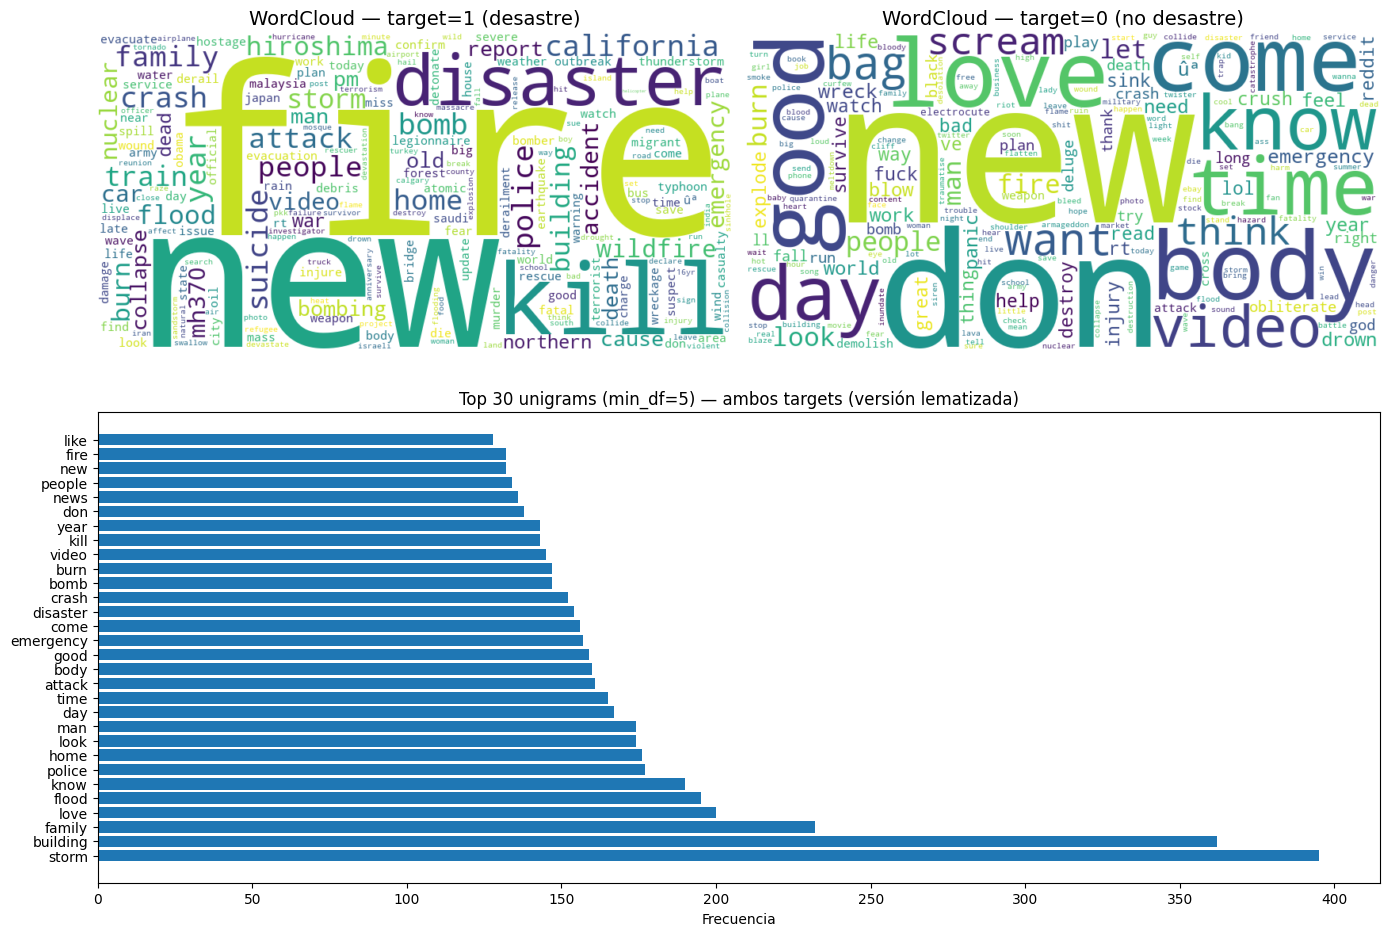

In [8]:
# WordClouds para target=1 vs target=0 + top-terms barplot
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# instalar wordcloud si no existe
try:
    from wordcloud import WordCloud, STOPWORDS
except Exception:
    print("Instalando wordcloud... (puede tardar unos segundos)")
    !pip install -q wordcloud
    from wordcloud import WordCloud, STOPWORDS

col = 'clean_text_lem' if 'clean_text_lem' in df.columns else 'clean_text'
texts1 = " ".join(df.loc[df.target==1, col].astype(str).tolist())
texts0 = " ".join(df.loc[df.target==0, col].astype(str).tolist())

# Generar cloud
wc_params = dict(width=800, height=400, background_color='white', stopwords=set(STOPWORDS), collocations=False)
wc1 = WordCloud(**wc_params).generate(texts1)
wc0 = WordCloud(**wc_params).generate(texts0)

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud — target=1 (desastre)', fontsize=14)

plt.subplot(2,2,2)
plt.imshow(wc0, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud — target=0 (no desastre)', fontsize=14)

vec = CountVectorizer(ngram_range=(1,1), token_pattern=r'\b\w+\b', min_df=5)
X = vec.fit_transform(df[col].astype(str))
sums = X.sum(axis=0).A1
terms = vec.get_feature_names_out()
top_n = 30
top_idx = sums.argsort()[::-1][:top_n]
top_terms = terms[top_idx]
top_counts = sums[top_idx]

plt.subplot(2,1,2)
plt.barh(range(top_n)[::-1], top_counts[::-1])
plt.yticks(range(top_n), top_terms[::-1])
plt.xlabel('Frecuencia')
plt.title('Top 30 unigrams (min_df=5) — ambos targets (versión lematizada)')
plt.tight_layout()
plt.show()


# Entrenamiento de modelos de clasificación

Ya que se ha realizado el análisis de la información que tenemos para analizar los mensajes, los sentimientos y palabras relacionadas con lso desastres notarurales, ahora es importante realizar modelos de clasificación. Con estos modelos lo que se busca es poder encontrar como las variables del set de datos y las palabras influyen en la clasificación de un mensaje como un dessastre o no desastre. La clasificación es binaria.

# Logistic Regression

In [9]:
# ### Evaluación del modelo: Logistic Regression

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, classification_report)
import time

RND = 42
col = 'clean_text_lem' if 'clean_text_lem' in df.columns else 'clean_text'
X_texts = df[col].astype(str).tolist()
y = df['target'].values

# Vectorizer y modelo
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, token_pattern=r'\b\w+\b')
clf = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=2000, random_state=RND)

# Asegurarse de que X_tfidf se ha vectorizado
X_tfidf = tfidf.fit_transform(X_texts)
print(f"Dimensiones de la matriz TF-IDF: {X_tfidf.shape}")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND)


t0 = time.time()

# predicciones (labels) y probabilidades (para ROC-AUC)
y_pred = cross_val_predict(clf, X_tfidf, y, cv=cv, method='predict', n_jobs=1)
y_proba = cross_val_predict(clf, X_tfidf, y, cv=cv, method='predict_proba', n_jobs=1)[:,1]
t1 = time.time()

# Métricas globales
acc = accuracy_score(y, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary', zero_division=0)
roc_auc = roc_auc_score(y, y_proba)

# Almacenar los resultados en un diccionario para la comparativa final
results_lr = {
    'accuracy': acc,
    'f1': f1,
    'roc_auc': roc_auc,
    'time': t1 - t0
}

# Impresión de los resultados
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}  Recall: {recall:.4f}  F1: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")

# Matriz de confusión y reporte
cm = confusion_matrix(y, y_pred)
print("Matriz de confusión (rows=actual, cols=pred):\n", cm)
print("\nClassification report (por clase):\n")
print(classification_report(y, y_pred, digits=4))

# Entrenar sobre todo el conjunto para inspección de pesos (interpretabilidad)
# Esto es opcional, pero útil para entender el modelo
clf.fit(X_tfidf, y)
feature_names = np.array(tfidf.get_feature_names_out())
coefs = clf.coef_.ravel()
top_pos_idx = np.argsort(coefs)[-25:][::-1]
top_neg_idx = np.argsort(coefs)[:25]

print("\nTop 15 features que empujan a target=1 (coef positivo):")
for f,c in zip(feature_names[top_pos_idx][:15], coefs[top_pos_idx][:15]):
    print(f"{f:>30}  {c:.3f}")

print("\nTop 15 features que empujan a target=0 (coef negativo):")
for f,c in zip(feature_names[top_neg_idx][:15], coefs[top_neg_idx][:15]):
    print(f"{f:>30}  {c:.3f}")

Dimensiones de la matriz TF-IDF: (7613, 3103)
Accuracy: 0.7964
Precision: 0.7722  Recall: 0.7463  F1: 0.7590
ROC-AUC: 0.8622

Matriz de confusión (rows=actual, cols=pred):
 [[3622  720]
 [ 830 2441]]

Classification report (por clase):

              precision    recall  f1-score   support

           0     0.8136    0.8342    0.8237      4342
           1     0.7722    0.7463    0.7590      3271

    accuracy                         0.7964      7613
   macro avg     0.7929    0.7902    0.7914      7613
weighted avg     0.7958    0.7964    0.7959      7613


Top 15 features que empujan a target=1 (coef positivo):
                     hiroshima  3.747
                      wildfire  3.156
                    california  2.847
                          kill  2.834
                         storm  2.832
                          fire  2.779
                    earthquake  2.739
                       bombing  2.608
                         train  2.439
                       typhoon  2.339

# Multinomial Naive Bayes

In [10]:

# ### Evaluación del modelo: Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import time
import numpy as np

# Configuración común
RND = 42
col = 'clean_text_lem' if 'clean_text_lem' in df.columns else 'clean_text'
X_texts = df[col].astype(str).tolist()
y = df['target'].values

# Vectorización TF-IDF
print("Vectorizando texto...")
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, token_pattern=r'\b\w+\b')
X_tfidf = tfidf.fit_transform(X_texts)
print(f"Dimensiones de la matriz TF-IDF: {X_tfidf.shape}")

# Definición del modelo y configuración de CV
model_nb = MultinomialNB()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND)

t0 = time.time()

# Predicciones y probabilidades con validación cruzada
y_pred_nb = cross_val_predict(model_nb, X_tfidf, y, cv=cv, n_jobs=1)
y_proba_nb = cross_val_predict(model_nb, X_tfidf, y, cv=cv, method='predict_proba', n_jobs=1)[:, 1]

t1 = time.time()

# Métricas
acc_nb = accuracy_score(y, y_pred_nb)
f1_nb = f1_score(y, y_pred_nb, average='binary')
roc_auc_nb = roc_auc_score(y, y_proba_nb)

# Guardar resultados en un diccionario para la comparación final
results_nb = {
    'accuracy': acc_nb,
    'f1': f1_nb,
    'roc_auc': roc_auc_nb,
    'time': t1 - t0
}

# Reporte
print(f"Accuracy: {acc_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")
print(f"ROC-AUC: {roc_auc_nb:.4f}")
print(f"Tiempo de ejecución: {t1 - t0:.2f} segundos")

print("\nMatriz de confusión:")
print(confusion_matrix(y, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y, y_pred_nb, digits=4))

Vectorizando texto...
Dimensiones de la matriz TF-IDF: (7613, 3103)
Accuracy: 0.8022
F1-Score: 0.7413
ROC-AUC: 0.8583
Tiempo de ejecución: 0.05 segundos

Matriz de confusión:
[[3949  393]
 [1113 2158]]

Classification Report:
              precision    recall  f1-score   support

           0     0.7801    0.9095    0.8399      4342
           1     0.8459    0.6597    0.7413      3271

    accuracy                         0.8022      7613
   macro avg     0.8130    0.7846    0.7906      7613
weighted avg     0.8084    0.8022    0.7975      7613



# Random Forest

In [11]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import time
import numpy as np

# Es necesario redefinir X_tfidf y y si no se han cargado en la misma sesión
if 'X_tfidf' not in locals() or 'y' not in locals():
    print("Cargando y vectorizando los datos nuevamente...")
    col = 'clean_text_lem' if 'clean_text_lem' in df.columns else 'clean_text'
    X_texts = df[col].astype(str).tolist()
    y = df['target'].values
    tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, token_pattern=r'\b\w+\b')
    X_tfidf = tfidf.fit_transform(X_texts)

# Definición del modelo y configuración de CV
model_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=RND, n_jobs=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND)

t0 = time.time()

# Predicciones y probabilidades con validación cruzada
y_pred_rf = cross_val_predict(model_rf, X_tfidf, y, cv=cv, n_jobs=1)
y_proba_rf = cross_val_predict(model_rf, X_tfidf, y, cv=cv, method='predict_proba', n_jobs=1)[:, 1]

t1 = time.time()

# Métricas
acc_rf = accuracy_score(y, y_pred_rf)
f1_rf = f1_score(y, y_pred_rf, average='binary')
roc_auc_rf = roc_auc_score(y, y_proba_rf)

# Guardar resultados en un diccionario para la comparación final
results_rf = {
    'accuracy': acc_rf,
    'f1': f1_rf,
    'roc_auc': roc_auc_rf,
    'time': t1 - t0
}

# Reporte
print(f"Accuracy: {acc_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"Tiempo de ejecución: {t1 - t0:.2f} segundos")

print("\nMatriz de confusión:")
print(confusion_matrix(y, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y, y_pred_rf, digits=4))

Accuracy: 0.7887
F1-Score: 0.7398
ROC-AUC: 0.8444
Tiempo de ejecución: 119.22 segundos

Matriz de confusión:
[[3717  625]
 [ 984 2287]]

Classification Report:
              precision    recall  f1-score   support

           0     0.7907    0.8561    0.8221      4342
           1     0.7854    0.6992    0.7398      3271

    accuracy                         0.7887      7613
   macro avg     0.7880    0.7776    0.7809      7613
weighted avg     0.7884    0.7887    0.7867      7613



In [12]:

# Consolida todos los resultados en un solo diccionario
final_results = {
    "Logistic Regression": results_lr,
    "Naive Bayes": results_nb,
    "Random Forest": results_rf
}

print("COMPARATIVA FINAL DE MODELOS")

# Imprime los resultados en un formato de tabla
print(f"{'Modelo':<20} | {'Accuracy':<10} | {'F1-Score':<10} | {'ROC-AUC':<10} | {'Tiempo (s)':<10}")
print('-' * 70)

for name, res in final_results.items():
    if 'error' not in res:
        print(f"{name:<20} | {res['accuracy']:.4f}     | {res['f1']:.4f}   | {res['roc_auc']:.4f}   | {res['time']:.2f}")
    else:
        print(f"{name:<20} | ERROR: {res['error']}")

# Identificar el mejor modelo basado en F1-Score
if final_results:
    best_model_name = max([(name, res['f1']) for name, res in final_results.items() if 'error' not in res], 
                          key=lambda x: x[1])[0]
    print(f"\nMEJOR MODELO: {best_model_name} (basado en F1-Score)")

COMPARATIVA FINAL DE MODELOS
Modelo               | Accuracy   | F1-Score   | ROC-AUC    | Tiempo (s)
----------------------------------------------------------------------
Logistic Regression  | 0.7964     | 0.7590   | 0.8622   | 0.17
Naive Bayes          | 0.8022     | 0.7413   | 0.8583   | 0.05
Random Forest        | 0.7887     | 0.7398   | 0.8444   | 119.22

MEJOR MODELO: Logistic Regression (basado en F1-Score)


Al final de todo el mejor modelo fue el de regresion logística logrnado un accuracy de 0.7964. Algo imoprtante a mencionar es que nos basamos en el F1-Score para poder ranquear el mejor, ya que este tiene en consideración todos los errores y haciertos al momento de clasificar. Esto es importante ya que si vemos todas las matrices de confusión tienen problema en 1 parte de la clasificación en específico. En el caso de los falsos negativos (osea la esquina izquierda inferior de la matriz), en todos los casos este fue el area donde hubo más errores. Por ejemplo en el caso del Naive Bayes aunque tuvo un accuracy mayor, fue el que tuvo más falsos negativos. Tuvo 1113 en total, esto quiere decir que 1113 tweets fueron marcados como "no desastre". Esto puede tener muchos motivos como las dificultades naturales que tienen los modelos para detectar sarcasmo, especialmente si tomamos en cuenta que Naive Bayes asume independencia de variables, por lo que puede que se haya confundido más que los demás debido a que toma las palabras independientemente del contexto seguramente. Ahora en el caso de de los falsos positivos se destaca que tiene muy pocos, 393 en total.

En el caso de random forest no hay mucho que destacar, de los 3 fue el que tuvo las menores métricas en todo prácticamente. Aunque de los 3 sea el algoritmo más pesado y complejo, no terminó por mejorar la precisión de las predicciones. Alcanzó un desempeño de 0.78 en accuracy y un valor de 0.73 en f1-score. Siguen siendo buenas métricas en general, pero comparado a los otrs modelos es ligeramente inferior. Este de igual forma tiene más falsos negativos que falso positivo, sigue el mismo patrón que los demas, habiendo 984 vs 625 respecticamente. 

Entonces al final de todo el modelo fue el de regresión logística fue el más equilibrado, aunque tenga un accuracy ligeramente menor, se puede ver que aunque tenga 830 falsos negativos y 720 falsos positivos, termina manteneniendo un alto accuracy relativo a los demas modelos y está mas equilibrado. Entonces por lo que seguramente será mejor para predecir, entonces podemos usarlo para probar con mensajes.

# Prueba de mensajes con el mejor modelo

In [13]:
# parte 7

import re
import html
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Cargar modelo de spaCy para lematización (si no está cargado)
try:
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
except:
    print("Descargando modelo en_core_web_sm...")
    !python -m spacy download en_core_web_sm -q
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def preprocess_tweet(text):
    """
    Preprocesa un tweet individual con los mismos pasos usados en el entrenamiento
    """
    if pd.isna(text) or text == "":
        return ""
    
    # 1. Limpieza básica (misma que usamos en el entrenamiento)
    s = str(text)
    s = html.unescape(s)  # decode html entities
    s = re.sub(r'http\S+|www\.\S+', ' ', s)  # remove urls
    s = re.sub(r'@\w+', ' ', s)  # remove mentions
    s = re.sub(r'#', '', s)  # remove hashtag symbol but keep the word
    s = re.sub(r'[^\w\s]', ' ', s)  # replace punctuation with space
    s = s.lower()  # lowercase
    s = re.sub(r'\s+', ' ', s).strip()  # collapse whitespace
    
    # 2. Lematización (mismo proceso que en entrenamiento)
    doc = nlp(s)
    lemmas = []
    for token in doc:
        if token.is_space or token.is_punct or token.is_stop or token.like_num:
            continue
        lemma = token.lemma_.lower().strip()
        if not lemma or lemma in STOP_WORDS or len(lemma) < 2:
            continue
        lemmas.append(lemma)
    
    return " ".join(lemmas)

def classify_tweet(tweet_text, model, vectorizer, threshold=0.5):

    cleaned_tweet = preprocess_tweet(tweet_text)
    
    # Vectorizar usando el mismo vectorizer del entrenamiento
    tweet_vectorized = vectorizer.transform([cleaned_tweet])
    
    # Predecir probabilidades
    proba = model.predict_proba(tweet_vectorized)[0]
    probability_disaster = proba[1]  # Probabilidad de clase 1 (desastre)
    
    # Clasificar basado en el threshold
    prediction = 1 if probability_disaster >= threshold else 0
    
    # Interpretación
    if prediction == 1:
        interpretation = "DESASTRE REAL"
    else:
        interpretation = "NO es desastre"
    
    # Palabras clave que influyeron (solo para Logistic Regression)
    influential_words = []
    if hasattr(model, 'coef_'):
        feature_names = vectorizer.get_feature_names_out()
        coefs = model.coef_[0]
        tweet_words = cleaned_tweet.split()
        
        # Encontrar palabras del tweet que están en el vocabulario
        for word in tweet_words:
            if word in feature_names:
                idx = np.where(feature_names == word)[0][0]
                influence = coefs[idx]
                influential_words.append((word, influence))
        
        # Ordenar por mayor influencia (absoluta)
        influential_words.sort(key=lambda x: abs(x[1]), reverse=True)
        influential_words = influential_words[:5] 
    
    return {
        'prediction': prediction,
        'probability_disaster': probability_disaster,
        'interpretation': interpretation,
        'cleaned_text': cleaned_tweet,
        'influential_words': influential_words
    }

def test_some_tweets():
    # Ejemplos de prueba
    test_tweets = [
        "Forest fire raging in California, evacuations underway! #emergency",
        "Just watched a movie about earthquakes, it was terrifying! 🎥",
        "Bomb explosion reported in downtown area, multiple casualties",
        "My phone battery died, need to find a charger ASAP 😅",
        "Hurricane warning issued for coastal areas, seek shelter immediately",
        "That concert was so lit, it was the bomb! 🔥🎵",
        "Flood waters rising rapidly, emergency services deployed",
        "I'm dead after that workout 💀 so tired"
    ]

    print("Pruebas de clasificación: \n")


    for i, tweet in enumerate(test_tweets, 1):
        result = classify_tweet(tweet, clf, tfidf)
        
        print(f"Tweet #{i}:")
        print(f"Original: {tweet}")
        print(f"Limpio: {result['cleaned_text']}")
        print(f"Predicción: {result['prediction']} ({result['interpretation']})")
        print(f"Probabilidad desastre: {result['probability_disaster']:.4f}")
        
        if result['influential_words']:
            print("Palabras más influyentes:")
            for word, influence in result['influential_words']:
                direction = "→ DESASTRE" if influence > 0 else "→ NO desastre"
                print(f"  '{word}': {influence:.3f} {direction}")
        
        print("-" * 80)
        print()

print("1. Probar mensajes guardados \n2. Escribir mensaje")
option = input("Ingresa la selección: ")

if option == "1":
    test_some_tweets()
elif option == "2":
    print("Probando con mensaje personalizado:")

    test_tweet = input("Escribe el mensaje en ingles: ")
    result = classify_tweet(test_tweet, clf, tfidf)
        
    print(f"Original: {test_tweet}")
    print(f"Limpio: {result['cleaned_text']}")
    print(f"Predicción: {result['prediction']} ({result['interpretation']})")
    print(f"Probabilidad desastre: {result['probability_disaster']:.4f}")
        
    if result['influential_words']:
        print("Palabras más influyentes:")
        for word, influence in result['influential_words']:
            direction = "→ DESASTRE" if influence > 0 else "→ NO desastre"
            print(f"  '{word}': {influence:.3f} {direction}")
        
    print()



1. Probar mensajes guardados 
2. Escribir mensaje
Probando con mensaje personalizado:
Original: An electrical storm was sighted yesterday
Limpio: electrical storm sight yesterday
Predicción: 1 (DESASTRE REAL)
Probabilidad desastre: 0.7098
Palabras más influyentes:
  'storm': 2.832 → DESASTRE
  'electrical': 0.195 → DESASTRE
  'yesterday': 0.028 → DESASTRE



Como podemos ver el modelo es capaz de clasificar mensajes donde claramente hay algún tipo de situación desastroza. Aunque como se puede ver en los ejemplos pre definidos, hay algunos donde es más complicado clasificar debido al contexto. Ahora bien, nos hemos enfocad o en las pálabras pero ahora la iea es poder profundizar más en el sentimiento de las mismas y para eso es necesario clasificar las palabras en positivas, neutras y negaticas.

# 

In [14]:
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar recursos necesarios
try:
    nltk.download('vader_lexicon')
except:
    print("Asegúrate de tener nltk instalado")

# Inicializar VADER (mejor para redes sociales)
sia = SentimentIntensityAnalyzer()

# Analiza un texto y cuenta palabras positivas, negativas y neutras usando el lexico vader
# importante mencionar que VADER maneja emojis
def analyze_sentiment_words(text):

    words = text.split()
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    
    for word in words:
        # Obtener puntuación de sentimiento para la palabra
        scores = sia.polarity_scores(word)
        
        # Clasificar basado en el compound score
        if scores['compound'] >= 0.05:
            positive_count += 1
        elif scores['compound'] <= -0.05:
            negative_count += 1
        else:
            neutral_count += 1
    
    total_words = len(words)
    if total_words > 0:
        positive_ratio = positive_count / total_words
        negative_ratio = negative_count / total_words
        neutral_ratio = neutral_count / total_words
    else:
        positive_ratio = negative_ratio = neutral_ratio = 0
    
    return {
        'positive_count': positive_count,
        'negative_count': negative_count, 
        'neutral_count': neutral_count,
        'positive_ratio': positive_ratio,
        'negative_ratio': negative_ratio,
        'neutral_ratio': neutral_ratio,
        'negativity': negative_count / max(1, total_words) 
    }

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Una vez definida la función para poder contabilizar la positivadad/negatividad de tweets podemos porbar usando el set de datos completo.

In [15]:
print("Calculando sentimiento para todos los tweets...")

sentiment_results = []
for text in df['clean_text_lem']:
    sentiment_results.append(analyze_sentiment_words(text))

# Crear nuevas columnas en el DataFrame
df['positive_words'] = [x['positive_count'] for x in sentiment_results]
df['negative_words'] = [x['negative_count'] for x in sentiment_results] 
df['neutral_words'] = [x['neutral_count'] for x in sentiment_results]
# esto se pide hasta el final en la parte 10 pero realmente es más práctico hacerlo de una vez
df['negativity'] = [x['negativity'] for x in sentiment_results]

# Mostrar resultados
print("Estadísticas de sentimiento:")
print(f"Palabras positivas totales: {df['positive_words'].sum()}")
print(f"Palabras negativas totales: {df['negative_words'].sum()}")
print(f"Palabras neutras totales: {df['neutral_words'].sum()}")

print("\nDistribución del score de sentimiento:")
print(df['negativity'].describe())

# Ver algunos ejemplos
print("\nEjemplos de tweets con su análisis de sentimiento:")
sample_df = df[['text', 'clean_text_lem', 'positive_words', 'negative_words', 'neutral_words', 'negativity', 'target']].sample(5)
display(sample_df)

Calculando sentimiento para todos los tweets...
Estadísticas de sentimiento:
Palabras positivas totales: 4146
Palabras negativas totales: 7427
Palabras neutras totales: 48725

Distribución del score de sentimiento:
count    7613.000000
mean        0.136849
std         0.159987
min         0.000000
25%         0.000000
50%         0.111111
75%         0.200000
max         1.000000
Name: negativity, dtype: float64

Ejemplos de tweets con su análisis de sentimiento:


,text,clean_text_lem,positive_words,negative_words,neutral_words,negativity,target
5548,Rainstorm Destroys 600 Houses in Yobe State: R...,rainstorm destroy house yobe state rainstorm d...,1,2,10,0.153846,1
7551,On the freeway to Africa til I wrecked my Audi,freeway africa til wreck audi,1,1,3,0.200000,0
4195,@DannyRaynard not bad personally I'd get rid o...,bad personally rid hazard aguero striker berahino,0,1,6,0.142857,0
3522,Read a SchoolboyÛªs Eyewitness Account of Hir...,read schoolboy ûªs eyewitness account hiroshima,0,0,6,0.000000,1
461,New post from @darkreading http://t.co/8eIJDXA...,new post new smb relay attack steal user crede...,0,2,8,0.200000,1


Ahora que hemos hecho un conteo de sentimiento/negatividad de las palabras es posible ver como el conteo de palabras se relaciona con el sentimiento del mensaje. Para ver esto de la forma más sencilla posible podemos ver los mensajes más "positivos" y "negativos" en base a los conteos de las palabras que acabamos de hacer.

In [16]:
# parte 9 mensajes mas negativos

top10_negativos = df.nlargest(10, 'negative_words')
top10_negativos[['text', 'target', 'text_len', 'negative_words', 'positive_words', 'neutral_words', 'negativity']]

,text,target,text_len,negative_words,positive_words,neutral_words,negativity
7472,wreck? wreck wreck wreck wreck wreck wreck wre...,0,79,13,0,0,1.000000
1540,Bomb Crash Loot Riot Emergency Pipe Bomb Nucle...,1,138,7,1,13,0.333333
1638,+ DID YOU SAY TO HIM!!?!?!?!' and phil actuall...,0,135,6,0,5,0.545455
2844,@peterjukes A crime that killed/displaced mill...,1,140,6,0,6,0.500000
3742,@Miss_HoMaStToPa cause were on fire we are on ...,1,124,6,1,2,0.666667
5009,the MOFO in DC will leave our military unarmed...,0,120,6,0,5,0.545455
88,Accident left lane blocked in #Manchester on R...,1,128,5,1,10,0.312500
141,family members of osama bin laden have died in...,1,110,5,0,8,0.384615
156,Pilot Dies In Plane Crash At Car Festival http...,1,138,5,1,7,0.384615
161,+ Nicole Fletcher one of a victim of crashed a...,1,140,5,0,7,0.416667


In [17]:
# parte 9 Mensajes mas positivos

top10_positivos = df.nlargest(10, 'positive_words')
top10_positivos[['text', 'target', 'text_len', 'positive_words', 'negative_words', 'neutral_words', 'negativity']]

,text,target,text_len,positive_words,negative_words,neutral_words,negativity
1909,Disillusioned lead character \r\nCheck\r\nHapp...,0,148,7,2,11,0.100000
3599,@spookyfob @feelslikefob I am okay thank you y...,0,118,6,1,3,0.100000
6992,Check out 'Want Twister Tickets AND A VIP EXPE...,0,140,6,0,6,0.000000
718,@JaydenNotJared I can't help it. Hope you're o...,0,132,5,1,7,0.076923
3163,@batfanuk we enjoyed the show today. Great fun...,0,111,5,1,4,0.100000
3382,@batfanuk we enjoyed the show today. Great fun...,0,111,5,1,4,0.100000
3816,What's cool is that teens are becoming what I ...,0,140,5,0,5,0.000000
4150,I don't pray harm on members of ISIS.I pray th...,0,143,5,1,11,0.058824
5033,First impressions: glad hat man is leaving in ...,0,117,5,1,7,0.076923
5793,@BLutz10 People aren't rioting because justice...,1,139,5,1,6,0.083333


# Análisis de la negatividad

Luego de haber obtenido los tweets más positivos y más negativos se pueden observar 2 situaciones relativamente distintas para ambos top 10. El fin de obtener la negatividad de los tweets es determinar si un mensaje puede ser clasificado con mayor facilidad como "desastre" o "no desastre" en base a la negatividad del mensaje y las palabras que contiene. Mientras más palabras negativas en teoría el mensaje debería de hacer referencia a un desastre. Pero como se puede observar, las palabras negativas en el caso del top 10 no siempre corresponden a un mensaje de desastre.

De los 10 mensajes con más palabras negativas hay 3 casos donde no es un mensaje de desastre. De hecho el caso más curioso es el primero. Es el mensaje con más palabras negativas con diferencia, pero realmente el mensaje solo es la misma palabra repetida y casualmente es negativa. Sin contexto este mensaje de hecho ni siquiera tiene sentido. Aparte de los 3 casos atípicos los otros 7 mensajes parecen que si son relaionados a desastres o situaciones negativas.

Por otra parte en el caso de el contea de palabras positivas se puede ver que realmente la correlación entre palabras positivas si tiene que ver con los mensajes un poco más. En este caso 9 de los 10 mensajes no hacen referencia a desastres, por lo que el conteo de palabras podemos decir que si ayuda a tener un mejor contexto del mensaje para los casos extremos (los más negativos y más positivos), aunque siempre hay algunos casos más dicíciles de identificar. Aparte de las observaciones, es importante corroborar esto de forma estadística tambiénesta relación puede analizarse de forma estadística:





Promedio de palabras NEGATIVAS por categoría:
target
0    0.821971
1    1.179456
Name: negative_words, dtype: float64

Promedio de palabras POSITIVAS por categoría:
target
0    0.664671
1    0.385203
Name: positive_words, dtype: float64


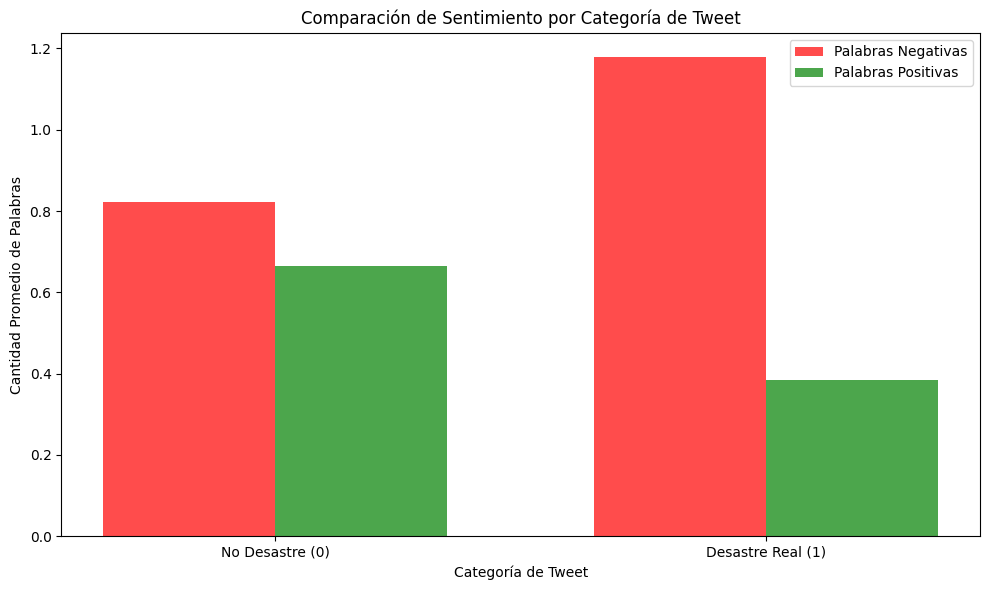

In [18]:
# Calcular el promedio de palabras negativas y positivas por categoría
import matplotlib.pyplot as plt
import numpy as np
palabras_negativas_por_categoria = df.groupby('target')['negative_words'].mean()
palabras_positivas_por_categoria = df.groupby('target')['positive_words'].mean()

print("Promedio de palabras NEGATIVAS por categoría:")
print(palabras_negativas_por_categoria)
print("\nPromedio de palabras POSITIVAS por categoría:")
print(palabras_positivas_por_categoria)


# Gráfico comparativo


categorias = ['No Desastre (0)', 'Desastre Real (1)']
promedio_negativas = [palabras_negativas_por_categoria[0], palabras_negativas_por_categoria[1]]
promedio_positivas = [palabras_positivas_por_categoria[0], palabras_positivas_por_categoria[1]]

x = np.arange(len(categorias))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, promedio_negativas, width, label='Palabras Negativas', color='red', alpha=0.7)
rects2 = ax.bar(x + width/2, promedio_positivas, width, label='Palabras Positivas', color='green', alpha=0.7)

ax.set_xlabel('Categoría de Tweet')
ax.set_ylabel('Cantidad Promedio de Palabras')
ax.set_title('Comparación de Sentimiento por Categoría de Tweet')
ax.set_xticks(x)
ax.set_xticklabels(categorias)
ax.legend()

plt.tight_layout()
plt.show()

Se puede ver que en promedio cuando ocurre un desastre si hay bastante más palabras negativas y pocas palabras positvas. Eso si en el caso cuando no hay desastre, siguen habiendo más palabras negativas que posiivas aunque la diferencia es poca. Es importante recordar que los mensaje provienen de twitter y puede que haya cierto sesgo en los tipos de mensajes. Por ejemplo un persona quejndose de su día o de alguna situación no es undesastre como tal, pero puede contener palabras negativas. Entonces, viendo estos resultados no solo tenemos el conteo de las palabras negativas sino que también tenemos una columna para medir la negatividad de un mensaje. Con esta información nuva podemos probar a reentrenar el modelo con los mejores resultados, el modelo de Regresion Logística.

# Modelo de regresión logística con variable de negatividad incluida

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
# Comparar con el modelo original 
from sklearn.model_selection import cross_val_score
# Combinar features: TF-IDF + negatividad
from scipy.sparse import hstack

# Preparar datos con la nueva feature de negatividad
X_texts = df['clean_text_lem'].astype(str).tolist()
X_negativity = df['negativity'].values.reshape(-1, 1)
y = df['target'].values

# Vectorización TF-IDF, lo mis de atnes
X_tfidf = tfidf.transform(X_texts)

X_combined = hstack([X_tfidf, X_negativity])

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

clf_enhanced = LogisticRegression(
    solver='liblinear', 
    class_weight='balanced', 
    max_iter=2000, 
    random_state=42
)

print("Entrenando modelo con feature de negatividad...")
clf_enhanced.fit(X_train, y_train)

# Predecir y evaluar
y_pred_enhanced = clf_enhanced.predict(X_test)
y_proba_enhanced = clf_enhanced.predict_proba(X_test)[:, 1]


acc_enhanced = accuracy_score(y_test, y_pred_enhanced)
f1_enhanced = f1_score(y_test, y_pred_enhanced, average='binary')
roc_auc_enhanced = roc_auc_score(y_test, y_proba_enhanced)

print("RESULTADOS DEL MODELO MEJORADO (CON NEGATIVIDAD)")
print(f"Accuracy: {acc_enhanced:.4f}")
print(f"F1-Score: {f1_enhanced:.4f}")
print(f"ROC-AUC: {roc_auc_enhanced:.4f}")



# Evaluar modelo original (solo TF-IDF)
cv_scores_original = cross_val_score(
    clf, X_tfidf, y, cv=5, scoring='f1', n_jobs=1
)
f1_original_mean = cv_scores_original.mean()
f1_original_std = cv_scores_original.std()

# Evaluar modelo mejorado (TF-IDF + negatividad)
cv_scores_enhanced = cross_val_score(
    clf_enhanced, X_combined, y, cv=5, scoring='f1', n_jobs=1
)
f1_enhanced_mean = cv_scores_enhanced.mean()
f1_enhanced_std = cv_scores_enhanced.std()

# Calcular mejora porcentual
improvement = ((f1_enhanced_mean - f1_original_mean) / f1_original_mean) * 100
print(f"\nMejora en F1-Score: {improvement:+.2f}%")

# Análisis de la importancia de la nueva feature
# El coeficiente de la feature de negatividad en el modelo
negativity_coef = clf_enhanced.coef_[0, -1]  # Último coeficiente
print(f"\nCoeficiente de la feature 'negatividad': {negativity_coef:.4f}")

if negativity_coef > 0:
    print("→ La negatividad está positivamente correlacionada con target=1 (desastre)")
else:
    print("→ La negatividad está negativamente correlacionada con target=1")

# Matriz de confusión del modelo mejorado
print("\nMatriz de Confusión (Modelo Mejorado):")
print(confusion_matrix(y_test, y_pred_enhanced))

# Classification report detallado
print("\nClassification Report (Modelo Mejorado):")
print(classification_report(y_test, y_pred_enhanced, digits=4))



Entrenando modelo con feature de negatividad...
RESULTADOS DEL MODELO MEJORADO (CON NEGATIVIDAD)
Accuracy: 0.8056
F1-Score: 0.7730
ROC-AUC: 0.8741

Mejora en F1-Score: -0.19%

Coeficiente de la feature 'negatividad': -0.0158
→ La negatividad está negativamente correlacionada con target=1

Matriz de Confusión (Modelo Mejorado):
[[723 146]
 [150 504]]

Classification Report (Modelo Mejorado):
              precision    recall  f1-score   support

           0     0.8282    0.8320    0.8301       869
           1     0.7754    0.7706    0.7730       654

    accuracy                         0.8056      1523
   macro avg     0.8018    0.8013    0.8015      1523
weighted avg     0.8055    0.8056    0.8056      1523



Como se puede ver a simple vista en el modelo, la regresión lineal sigue teniendo un alta precisión para el tipo de problema que estamos procesando. Eso si, hay un ligero incremento en el accuracy en comparación al modelo de regresión logística anterior. En este último modelo hemos incluido emojis también, por lo que se han tomado en cuenta. Tiene una mejora de 1% aaproximadamente. Previamente era de 0.796, realmente la diferencia al incluir la variable de negatividad creada no es mucha. Eso sí el f1-score cambió también siendo ahora ligeramente menor. Algo que se mantuvo es el balance en la predicción de falsos positivos y falsos negativos, siendo un modelo bastante bien generalizado. En cierta forma se puede esperar que el resultado no mejore mucho, ya que analiando previamente el conteo de palabras negativas y positivas nos damos cuenta que solo están más presentes en los mensajes clasificados como desastre, mientras que los no desastre no necesariamente son más positivos. Esto lo podemos terminar de confirmar comparando ambos modelos.

In [25]:
print("Analisis y comparación de mejoras:")

if improvement > 0:
    print("LA INCLUSIÓN DE LA VARIABLE 'NEGATIVIDAD' MEJORÓ EL MODELO")
    print(f"   Mejora en F1-Score: {improvement:.2f}%")
    print(f"   De {f1_original_mean:.4f} a {f1_enhanced_mean:.4f}")
    
    if improvement > 2:
        print("   Mejora SIGNIFICATIVA: La negatividad aporta información valiosa")
    else:
        print("   Mejora marginal: La negatividad ayuda pero no dramatically")
        
else:
    print("LA VARIABLE 'NEGATIVIDAD' NO MEJORÓ EL MODELO")
    print(f"   Cambio en F1-Score: {improvement:.2f}%")

print(f"\nINTERPRETACIÓN DEL COEFICIENTE ({negativity_coef:.4f}):")
if negativity_coef > 0:
    print("   Los tweets más negativos tienen mayor probabilidad de ser desastres reales")
    print("   Esto tiene sentido intuitivo: los desastres suelen describirse con lenguaje negativo")
else:
    print("   Los tweets más negativos tienen menor probabilidad de ser desastres reales")
    print("   Esto podría indicar que el lenguaje muy negativo es más común en quejas/metáforas")


Analisis y comparación de mejoras:
LA VARIABLE 'NEGATIVIDAD' NO MEJORÓ EL MODELO
   Cambio en F1-Score: -0.19%

INTERPRETACIÓN DEL COEFICIENTE (-0.0158):
   Los tweets más negativos tienen menor probabilidad de ser desastres reales
   Esto podría indicar que el lenguaje muy negativo es más común en quejas/metáforas


Esta última comparación nos indica que las palabras negativas no necesariamente pertenecen a mensajes que hacen referencia a desastres. Aunque bien es cierto que los tweets realcioandos a desasstres usan palabras negativas, los que no hacen referencia a desastres no necesariamente son más positivos. Twitter es una red social al final de cuentas y un mensaje no solo puede ser desastre o no desastre, muchas personas comparten su día, situaciones complicadas o quejas. Situaciones que son difíciles de clasificar sin saber el contexto completo del tweet y no solo el mensaje. Al final, la negatividad calculada del mensaje no es indicador directo que ayuda a clasficiar mejor los mensajes en "desastre" y "no desastre", pero el modelo no empeoró singificativamente tampoco. La negatividad sí ayuda a dar un poco más de contexto dentro del propio mensaje y el tono del mismo, pero se mantiene el desafío del sacarsmo, contexto externo y demás aunque se incluya la variable. Ya que al final los tweets negativos tienen ligeramente menor probabiliidad de ser desastres reales.